# Pymaceuticals Inc.
---

### Analysis

- Analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_data = study_results.merge(mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
combined_mouse_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
mice_count = combined_mouse_data["Mouse ID"].nunique()

mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_duplicated = combined_mouse_data[combined_mouse_data.duplicated # Returns a boolean Series to see if it has a duplicate or is unique
                                      (subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()

mice_duplicated

array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = combined_mouse_data.drop_duplicates(subset=["Mouse ID"])

clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice in the clean DataFrame.

number_of_mice = len(clean_data["Mouse ID"].unique())

number_of_mice

249

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


group_data = combined_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]
values_of_mean = group_data.mean()
values_of_median = group_data.median()
variance_value = group_data.var()
std_dev_value = group_data.std()
sem_value = group_data.sem()

stats_df = pd.DataFrame({
    "Mean Tumour Volume": values_of_mean,
    "Median Tumor Volume": values_of_median,    
    "Tumor Volume Variance": variance_value,
    "Tumor Volume Std. Dev.": std_dev_value,
    "Tumor Volume Std. Err.": sem_value
})


stats_df

,Mean Tumour Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

advanced_df = combined_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean", Median="median", Variance="var", Std_Dev="std", SEM="sem"
)

advanced_df

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

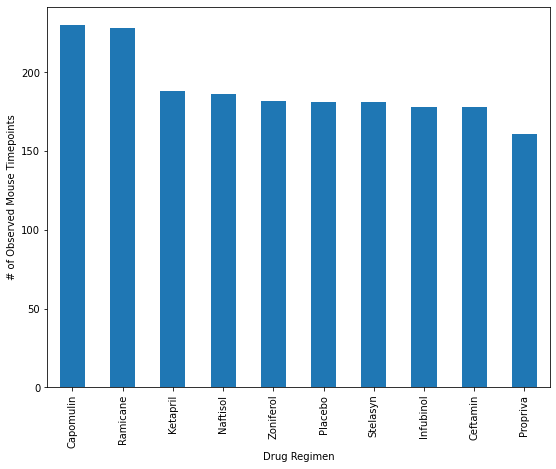

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen = combined_mouse_data["Drug Regimen"].value_counts()

regimen.plot(kind="bar", figsize=(9, 7))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

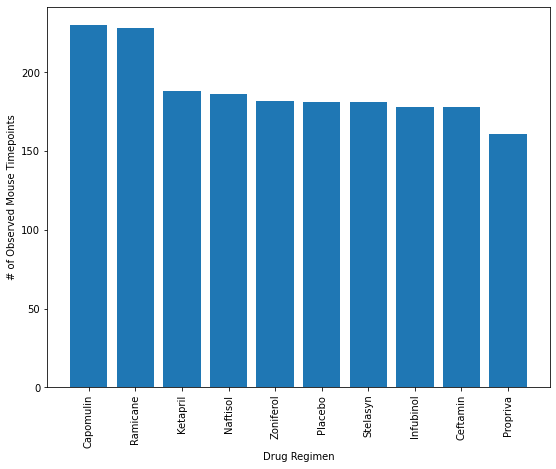

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen = combined_mouse_data["Drug Regimen"].value_counts()

plt.figure(figsize=(9, 7))
plt.bar(regimen.index, regimen.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

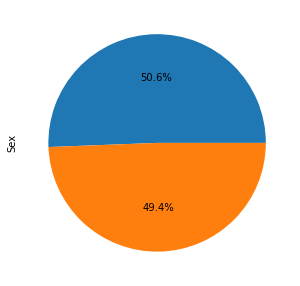

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = combined_mouse_data["Sex"].value_counts()
graph = mice_gender.plot(kind="pie", autopct=lambda p: "{:.1f}%".format(p), startangle=0, figsize=(5, 5), labels=None)
graph.set_ylabel("Sex")
graph.set_facecolor("white")

plt.show()


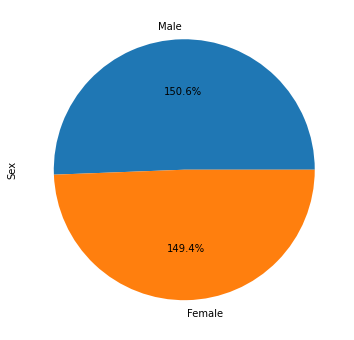

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_gender = combined_mouse_data["Sex"].value_counts()
plt.figure(figsize=(6, 6), facecolor="white") # Setting color to white as it does not automatically do it
mice_gender.plot(kind="pie", autopct="1%.1f%%", startangle=0)
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

greatest_timepoint = combined_mouse_data.groupby("Mouse ID")["Timepoint"].max()

treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
clean_data = combined_mouse_data[combined_mouse_data["Drug Regimen"].isin(treatment)] #isin is a great method that helps in selecting rows with having a specif or multiple value in a column
merged_data = pd.merge(clean_data, greatest_timepoint, on=["Mouse ID", "Timepoint"])

merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,c326,5,36.321346,0,Infubinol,Female,18,25
2,c139,45,72.226731,2,Infubinol,Male,11,28
3,v339,5,46.250112,0,Infubinol,Male,20,26
4,a577,30,57.031862,2,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
95,t565,45,34.455298,0,Capomulin,Female,20,17
96,i557,45,47.685963,1,Capomulin,Female,1,24
97,m957,45,33.329098,1,Capomulin,Female,3,19
98,f966,20,30.485985,0,Capomulin,Male,16,17


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


for treatment in treatments:
    treatment_data = merged_data[merged_data["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_vol_data.append(treatment_data)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowr_q = quartiles[0.25]
    uppr_q = quartiles[0.75]
    iqr = uppr_q - lowr_q
    lower = lowr_q - 1.5 * iqr
    upper = uppr_q + 1.5 * iqr


    outliers = treatment_data[(treatment_data < lower) | (treatment_data > upper)]
    print(f"{treatment}'s potential outliers: {outliers}\n")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 1    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



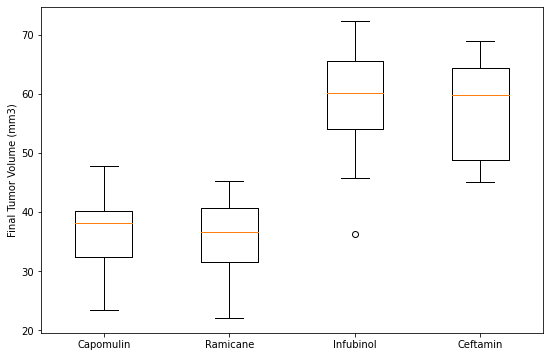

In [14]:
tumor_vol_data = [merged_data[merged_data
                              ["Drug Regimen"] == treatment]["Tumor Volume (mm3)"] for treatment in treatments]

plt.figure(figsize=(9, 6))
plt.boxplot(tumor_vol_data, labels=treatments)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

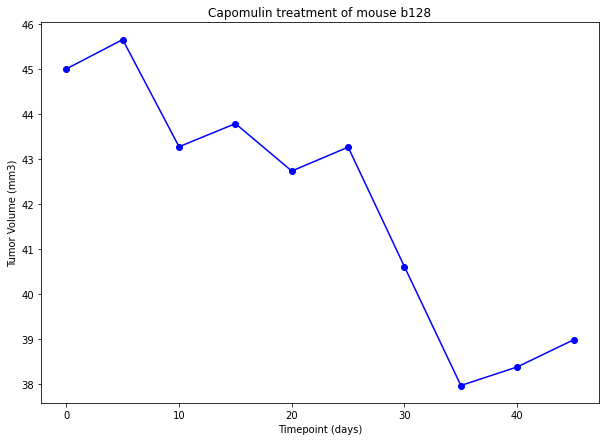

In [26]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse = "b128"

selected_mouse_data = combined_mouse_data[(combined_mouse_data["Mouse ID"] == mouse) & 
                                          (combined_mouse_data["Drug Regimen"] == "Capomulin")]

plt.figure(figsize=(10, 7))
plt.plot(selected_mouse_data["Timepoint"], selected_mouse_data["Tumor Volume (mm3)"], marker='o', color='b')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse b128")

plt.show()


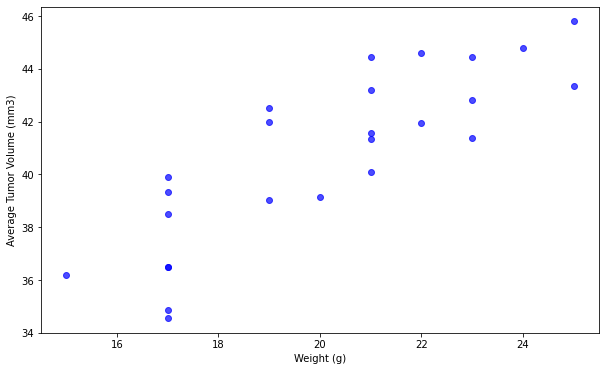

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate the average tumor volume under capomulin regimin
capomulin_avg_tumor_vol = combined_mouse_data[combined_mouse_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capomulin_avg_tumor_vol = pd.merge(capomulin_avg_tumor_vol, mouse_metadata, on="Mouse ID")

plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_tumor_vol["Weight (g)"], capomulin_avg_tumor_vol["Tumor Volume (mm3)"], color="b", alpha=0.7)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
